In [56]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from numpy.random import normal

In [57]:
iris = datasets.load_iris()

X, y = iris['data'], iris['target']
X += normal(0, 2, X.shape)
y[y == 2] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [58]:
clf = LinearSVC().fit(X_train, y_train)
y_test_pred = clf.decision_function(X_test)
y_test_pred = (y_test_pred - y_test_pred.min()) / (y_test_pred.max() - y_test_pred.min())

In [59]:
def get_reliability_curve(y, y_pred):
    fraction_of_positives, mean_predicted_value = calibration_curve(y, y_pred, n_bins=5)
    print zip(mean_predicted_value, fraction_of_positives)
    plt.plot(mean_predicted_value, fraction_of_positives)

# get_reliability_curve(y_test, y_test_pred)

In [60]:
isotonic = CalibratedClassifierCV(clf, cv=2, method='isotonic')
sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
isotonic.fit(X_train, y_train)
sigmoid.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=2, method='sigmoid')

In [61]:
sig_prob = sigmoid.predict_proba(X_test)[:, 1]
isotonic_prob = isotonic.predict_proba(X_test)[:, 1]

[(0.32858682145233936, 0.16666666666666666), (0.51826203398967186, 0.0), (0.71164834894208195, 0.40000000000000002), (0.9111955188793196, 0.8571428571428571)]


<IPython.core.display.Javascript object>


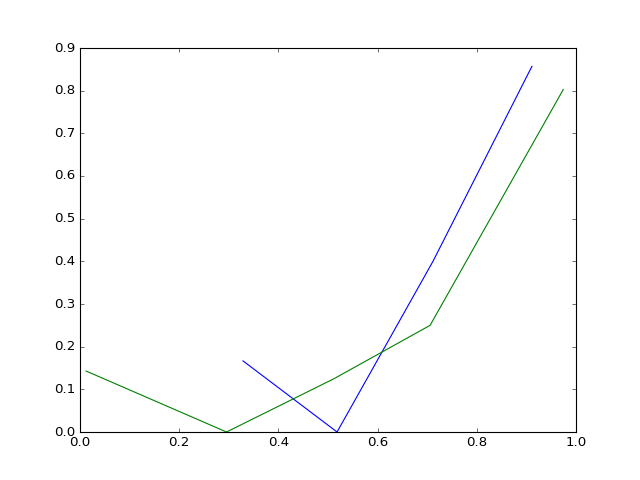

[(0.012275310629332679, 0.14285714285714285), (0.29542147821605819, 0.0), (0.51218473514583251, 0.125), (0.70584392097190995, 0.25), (0.97430403229011187, 0.80263157894736847)]


In [62]:
get_reliability_curve(y_test, sig_prob)
get_reliability_curve(y_test, isotonic_prob)